In [4]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), '..')))
import flares

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from flares_utility.stats import poisson_confidence_interval
import cmasher as cmr
import h5py
import flares_utility.analyse as analyse


# set style
plt.style.use('../matplotlibrc.txt')



['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
['005_z010p000', '006_z009p000', '007_z008p000', '008_z007p000', '009_z006p000', '010_z005p000']
Galaxy
Galaxy/details
Galaxy/details/blackhole_accretion_rate
Galaxy/details/blackhole_accretion_rate/10
Galaxy/details/blackhole_accretion_rate/100
Galaxy/details/blackhole_accretion_rate/20
Galaxy/details/blackhole_accretion_rate/200
Galaxy/details/blackhole_accretion_rate/50
Galaxy/details/blackhole_accretion_rate/instant
Galaxy/details/blackhole_mass
Galaxy/master
Galaxy/master/attenuated_stellar_halpha_ew
Galaxy/master/attenuated_stellar_halpha_luminosity
Galaxy/master/blackhole_accretion_rate
Galaxy/master/blackhole_accretion_rate/instant
Galaxy/master/blackhole_id
Galaxy/master/blackhole_mass
Galaxy/master/intrinsic_stellar_halpha_ew
Galaxy/master

## Testing different methods

In [2]:
# binw = 0.2
# X_limits = [44.6, 46.49]
# Y_limits = [-7.9, -2.01]

# z = 5

# tag = flares.tag_from_zed[z]

# print(z, tag)

# fig = plt.figure(figsize = (3.5, 3.5))

# left  = 0.15
# height = 0.8
# bottom = 0.15
# width = 0.8

# ax = fig.add_axes((left, bottom, width, height))
# # --- FLARES


# V = (4./3) * np.pi * (flares.radius)**3 # Mpc^3

# bin_edges = np.arange(*X_limits, binw)
# bin_centres = bin_edges[:-1]+binw/2




# # trying to just use weights

# blackhole_mass, blackhole_accretion_rate, bolometric_luminosity, eddington_ratio, weights = utilities.load_data()

# x = np.log10(bolometric_luminosity.to('erg/s').value)

# N, _ = np.histogram(x, bins = bin_edges)
# Nw, _ = np.histogram(x, bins = bin_edges, weights=weights)

# phi = (Nw / V) / binw

# ax.plot(bin_centres, np.log10(phi), ls ='-', c='k', lw=4, alpha=0.3, zorder=2)



# ## using utilities to load individual simulations

# blackhole_masses, blackhole_accretion_rates, bolometric_luminosities = utilities.load_data_sims()

# phi = np.zeros(len(bin_centres))
# N = np.zeros(len(bin_centres))

# for i, (sim, w) in enumerate(zip(flares.sims, flares.weights)):
#     x = np.log10(bolometric_luminosities[sim].to('erg/s').value) 
#     N_temp, _ = np.histogram(x, bins = bin_edges)
#     N += N_temp
#     phi_temp = (N_temp / V) / binw
#     phi += phi_temp * w

# ax.plot(bin_centres, np.log10(phi), ls ='-', c='b', lw=2, alpha=0.5, zorder=2)


# ## old approach

# phi = np.zeros(len(bin_centres))
# N = np.zeros(len(bin_centres))

# blackhole_accretion_rates = flares.load_dataset(tag, *['Galaxy', 'BH_Mdot'])

# for i, (sim, w) in enumerate(zip(flares.sims, flares.weights)):

#     blackhole_accretion_rate = np.array(blackhole_accretion_rates[sim]) * blackhole_accretion_rate_units

#     # bolometric luminosity
#     bolometric_luminosity = utilities.calculate_bolometric_luminosity(blackhole_accretion_rate)
#     bolometric_luminosity = bolometric_luminosity.to('erg/s').value
#     bolometric_luminosity = bolometric_luminosity[bolometric_luminosity>0.0]
#     x = np.log10(bolometric_luminosity) 

#     N_temp, _ = np.histogram(x, bins = bin_edges)
#     N += N_temp
#     phi_temp = (N_temp / V) / binw
#     phi += phi_temp * w

# ax.plot(bin_centres, np.log10(phi), ls ='--', c='r', lw=2, alpha=0.5, zorder=2)



# # ax.set_xlim(X_limits)
# # ax.set_ylim(Y_limits)

# # fig.savefig(f'figures/bolometric_luminosity_function-z{z}.pdf')
# plt.show()
# fig.clf()

## Single redshift

In [3]:
# binw = 0.2
# X_limits = [44.6, 46.49]
# Y_limits = [-7.9, -2.01]

# z = 5


# fig = plt.figure(figsize = (3.5, 3.5))

# left  = 0.15
# height = 0.8
# bottom = 0.15
# width = 0.8

# ax = fig.add_axes((left, bottom, width, height))
# # --- FLARES

# # flares.list_datasets()

# V = (4./3) * np.pi * (flares.radius)**3 # Mpc^3

# bin_edges = np.arange(*X_limits, binw)
# bin_centres = bin_edges[:-1]+binw/2

# ax.fill_between([0, 45.],[-9,-9],[0,0],color='k',alpha=0.05)

# tag = flares.tag_from_zed[z]


# phi = np.zeros(len(bin_centres))
# N = np.zeros(len(bin_centres))


# ## ---- get data
# # total Lbol BH, all simulations
# blackhole_accretion_rates = flares.load_dataset(tag, *['Galaxy', 'BH_Mdot'])

# for i, (sim, w) in enumerate(zip(flares.sims, flares.weights)):

#     blackhole_accretion_rate = np.array(blackhole_accretion_rates[sim]) * blackhole_accretion_rate_units

#     # bolometric luminosity
#     bolometric_luminosity = utilities.calculate_bolometric_luminosity(blackhole_accretion_rate)
#     bolometric_luminosity = bolometric_luminosity.to('erg/s').value
#     bolometric_luminosity = bolometric_luminosity[bolometric_luminosity>0.0]
#     x = np.log10(bolometric_luminosity) 

#     N_temp, _ = np.histogram(x, bins = bin_edges)
#     N += N_temp
#     phi_temp = (N_temp / V) / binw
#     phi += phi_temp * w

# upper = np.array([poisson_confidence_interval(n)[1] for n in N])
# lower = np.array([poisson_confidence_interval(n)[0] for n in N])

# phi_upper = phi * upper / N
# phi_lower = phi * lower / N
# ax.fill_between(bin_centres, np.log10(phi_upper), np.log10(phi_lower), alpha=0.1, color='k')

# ax.plot(bin_centres, np.log10(phi), ls ='-', c='k', lw=2, alpha=1.0, zorder=2)
# # ax.plot(bin_centres[N>4], np.log10(phi[N>4]), ls = '-', c=c, lw=2)



# # phi = np.zeros(len(bin_centres))
# # N = np.zeros(len(bin_centres))


# # ## ---- get data
# # # total Lbol BH, all simulations
# # blackhole_accretion_rates = flares.load_dataset(tag, *['Galaxy', 'BH_Mdot'])
# # blackhole_masses = flares.load_dataset(tag, *['Galaxy', 'BH_Mass'])

# # for i, (sim, w) in enumerate(zip(flares.sims, flares.weights)):

# #     blackhole_accretion_rate = np.array(blackhole_accretion_rates[sim]) * blackhole_accretion_rate_units
# #     blackhole_mass = 1E10 * np.array(blackhole_masses[sim]) * blackhole_mass_units / h

# #     mass_selection = blackhole_mass.to('Msun').value > 1E4

# #     blackhole_accretion_rate = blackhole_accretion_rate[mass_selection]
# #     blackhole_mass = blackhole_mass[mass_selection]

# #     eddington_accretion_rate = utilities.calculate_eddington_accretion_rate(blackhole_mass)
# #     eddington_ratio = blackhole_accretion_rate / eddington_accretion_rate

# #     selection = eddington_ratio > 0.03

# #     # bolometric luminosity
# #     bolometric_luminosity = utilities.calculate_bolometric_luminosity(blackhole_accretion_rate)
# #     bolometric_luminosity = bolometric_luminosity.to('erg/s').value

# #     # apply selection
# #     bolometric_luminosity = bolometric_luminosity[selection]
# #     x = np.log10(bolometric_luminosity) 

# #     N_temp, _ = np.histogram(x, bins = bin_edges)
# #     N += N_temp
# #     phi_temp = (N_temp / V) / binw
# #     phi += phi_temp * w

# # ax.plot(bin_centres, np.log10(phi), ls ='-', c='k', lw=2, alpha=1.0, zorder=2)







# ax.set_xlim(X_limits)
# ax.set_ylim(Y_limits)

# fig.savefig(f'figures/bolometric_luminosity_function-z{z}.pdf')
# plt.show()
# fig.clf()

## Single panel all redshifts

/Users/sw376/Dropbox/Research/projects/flares_agn_ionising/venv/lib/python3.10/site-packages/unyt/array.py:1949: RuntimeWarning: invalid value encountered in divide
  out_arr = func(
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_72980/2921997032.py:36: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(quantities['bolometric_luminosities']['10'].to('erg/s').value)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_72980/2921997032.py:36: RuntimeWarning: invalid value encountered in log10
  x = np.log10(quantities['bolometric_luminosities']['10'].to('erg/s').value)
/Users/sw376/Dropbox/Research/projects/flares_agn_ionising/venv/lib/python3.10/site-packages/unyt/array.py:1824: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


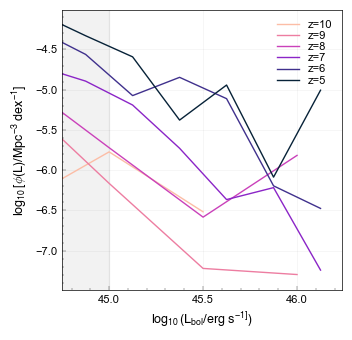

In [7]:

X_limits = [44.75, 46.24]
Y_limits = [-7.49, -4.01]

fig = plt.figure(figsize = (3.5, 3.5))

left  = 0.15
height = 0.8
bottom = 0.15
width = 0.8

ax = fig.add_axes((left, bottom, width, height))

# --- FLARES

# flares.list_datasets()

V = (4./3) * np.pi * (flares.radius)**3 # Mpc^3

ax.fill_between([0, 45.],[-9,-9],[0,0],color='k',alpha=0.05)



colours = cmr.take_cmap_colors('cmr.bubblegum_r', len(flares.redshifts))

for z, tag, color in zip(flares.redshifts, flares.tags, colours):

    if z > 7:
        binw = 0.5
    else:
        binw = 0.25

    bin_edges = np.arange(44.25, 46.49, binw)
    bin_centres = bin_edges[:-1]+binw/2

    quantities = flares.get_quantities(tag, group='details')
    x = np.log10(quantities['bolometric_luminosities']['10'].to('erg/s').value)

    N, _ = np.histogram(x, bins = bin_edges)
    Nw, _ = np.histogram(x, bins = bin_edges, weights=quantities['weights'])

    phi = (Nw / V) / binw

    upper = np.array([poisson_confidence_interval(n)[1] for n in N])
    lower = np.array([poisson_confidence_interval(n)[0] for n in N])

    phi_upper = phi * upper / N
    phi_lower = phi * lower / N
    # ax.fill_between(bin_centres, np.log10(phi_upper), np.log10(phi_lower), alpha=0.05, color='k')

    ax.plot(bin_centres, np.log10(phi), ls ='-', c=color, lw=1, alpha=1.0, zorder=2, label=f'z={z}')
    # ax.plot(bin_centres[N>4], np.log10(phi[N>4]), ls = '-', c=c, lw=2)

ax.legend(fontsize=8, labelspacing=0.1)

ax.set_xlim(X_limits)
ax.set_ylim(Y_limits)
ax.set_xticks(np.arange(45., 46.5, 0.5))

ax.set_ylabel(r'$\rm\log_{10}[\phi(L)/Mpc^{-3}\ dex^{-1}]$')
ax.set_xlabel(r'$\rm \log_{10}(L_{bol}/erg\ s^{-1]})$')

fig.savefig(f'figures/bolometric_luminosity_function.pdf')
plt.show()
fig.clf()